<a href="https://colab.research.google.com/github/jeromepatel/GDSC-AI-ML-Session-Oct-2021/blob/master/Applications_of_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Applications of Deep Learning

**Note:**
First please make sure that this notebook uses GPU runtime in colab, run the next cell and see the output which says something like which GPU and memory, you can find GPU if you get `name: "/device:GPU:0"` like this. Have fun with this session on application of deep learning! Good luck!

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3819248003437565974, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11345264640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12507503841911283736
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [3]:
#more info
!nvidia-smi

Sun Oct  3 08:00:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    70W / 149W |    121MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1 Face Generation with StyleGAN and Python

GANs have appeared frequently in the media, showcasing their ability to generate extremely photorealistic faces.  One significant step forward for realistic face generation was the NVIDIA StyleGAN series. NVIDIA introduced the origional StyleGAN in 2018. [[Cite:karras2019style]](https://arxiv.org/abs/1812.04948) StyleGAN was followed by StyleGAN2 in 2019, which improved the quality of StyleGAN by removing certian artifacts. [[Cite:karras2019analyzing]](https://arxiv.org/abs/1912.04958) Most recently, in 2020, NVIDIA released StyleGAN2 adaptive discriminator augmentation (ADA), which will be the focus of this module. [[Cite:karras2020training]](https://arxiv.org/abs/2006.06676)  We will see both how to train StyleGAN2 ADA on any arbitray set of images; as well as use pretrained weights provided by NVIDIA.  The NVIDIA weights allow us to generate high resolution photorealistic looking faces, such seen in Figure 7.STY-GAN.

**Figure 7.STY-GAN: StyleGAN2 Generated Faces**
![StyleGAN2 Generated Faces](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/stylegan2_images.jpg "StyleGAN2 Generated Faces")

The above images were generated with StyleGAN2, using Google CoLab.  Following the instructions in this section, you will be able to create faces like this of your own.  StyleGAN2 images are usually 1,024 x 1,024 in resolution.  An example of a full resolution StyleGAN image can be [found here](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/stylegan2-hires.jpg). 

The primary advanced introduced by the adaptive discriminator augmentation is that the training images are augmented in real time. Image augmentation is a common technique in many convolution neural network applications.  Augmentation has the effect of increasing the size of the training set.  Where StyleGAN2 previously required over 30K images for an effective to develop an effective neural network; now much fewer are needed. I used 2K images to train the fish generating GAN for this section.  Figure 7.STY-GAN-ADA demonstrates the ADA process.

**Figure 7.STY-GAN-ADA: StyleGAN2 ADA Training**
![StyleGAN2 Generated Faces](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/stylegan2-ada-teaser-1024x252.jpg "StyleGAN2 Generated Faces")

The figure shows the increasing probability of augmentation, as $p$ increases. For small image sets the discriminator will generally memorize the image set unless the training algorithm makes use of augmentation. Once this memorization occurs, the discriminator is no longer providing useful information to the training of the generator.

While the above images look much more realistic than images generated earlier in this course, they are not perfect.  Look at Figure 7.STYLEGAN2. There are usually a number of tell-tail signs that you are looking at a computer generated image.  One of the most obvious is usually the surreal, dream-like backgrounds.  The background does not look obviously fake, at first glance; however, upon closer inspection you usually can't quite discern exactly what a GAN generated background actually is.  Also look at the image character's left eye.  It is slightly unrealistic looking, especially near the eyelashes.

Look at the following GAN face.  Can you spot any imperfections?

**Figure 7.STYLEGAN2: StyleGAN2 Face**
![StyleGAN2 Face](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/gan_bad.jpg "StyleGAN2 Face")

* Image A demonstrates the very abstract backgrounds usually associated with a GAN generated image.
* Image B exhibits issues that earrings often present for GANs. GANs sometimes have problems with symmetry, particularly earrings.
* Image C contains an abstract background, as well as a highly distorted secondary image.
* Image D also contains a highly distorted secondary image that might be a hand.

There are a number of websites that allow you to generate GANs of your own without any software.

* [This Person Does not Exist](https://www.thispersondoesnotexist.com/)
* [Which Face is Real](http://www.whichfaceisreal.com/)

The first site generates high resolution images of human faces.  The second site presents a quiz to see if you can detect the difference between a real and fake human faceimage.

In this module you will learn to create your own StyleGAN2 pictures using Python.

In [ ]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
!pip install ninja
!pip install gptj

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 125, done.
remote: Total 125 (delta 0), reused 0 (delta 0), pack-reused 125
Receiving objects: 100% (125/125), 1.12 MiB | 4.77 MiB/s, done.
Resolving deltas: 100% (55/55), done.
     |████████████████████████████████| 108 kB 2.3 MB/s 
     |████████████████████████████████| 3.5 MB 2.3 MB/s 


In [ ]:
!ls /content/stylegan2-ada-pytorch/

calc_metrics.py  docker_run.sh	LICENSE.txt   style_mixing.py
dataset_tool.py  docs		metrics       torch_utils
dnnlib		 generate.py	projector.py  training
Dockerfile	 legacy.py	README.md     train.py


In [ ]:
#@title Imports and Functions, Caution: Don't forget to run this cell to avoid execution error!!
import sys
sys.path.insert(0, "/content/stylegan2-ada-pytorch")
import pickle
import os
import numpy as np
import PIL.Image
from IPython.display import Image
import matplotlib.pyplot as plt
import IPython.display
import torch
import dnnlib
import legacy

def seed2vec(G, seed):
  return np.random.RandomState(seed).randn(1, G.z_dim)

def display_image(image):
  plt.axis('off')
  plt.imshow(image)
  plt.show()

def generate_image(G, z, truncation_psi):
    # Render images for dlatents initialized from random seeds.
    Gs_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True),
        'randomize_noise': False
    }
    if truncation_psi is not None:
        Gs_kwargs['truncation_psi'] = truncation_psi

    label = np.zeros([1] + G.input_shapes[1][1:])
    images = G.run(z, label, **G_kwargs) # [minibatch, height, width, channel]
    return images[0]

def get_label(G, device, class_idx):
  label = torch.zeros([1, G.c_dim], device=device)
  if G.c_dim != 0:
      if class_idx is None:
          ctx.fail('Must specify class label with --class when using a conditional network')
      label[:, class_idx] = 1
  else:
      if class_idx is not None:
          print ('warn: --class=lbl ignored when running on an unconditional network')
  return label

def generate_image(device, G, z, truncation_psi=1.0, noise_mode='const', class_idx=None):
  z = torch.from_numpy(z).to(device)
  label = get_label(G, device, class_idx)
  img = G(z, label, truncation_psi=truncation_psi, noise_mode=noise_mode)
  img = (img.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
  #PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB').save(f'{outdir}/seed{seed:04d}.png')
  return PIL.Image.fromarray(img[0].cpu().numpy(), 'RGB')

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/afhqdog.pkl"...
Seed 120


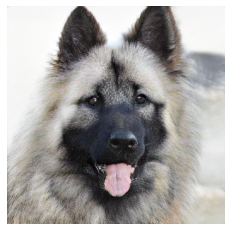

Seed 121


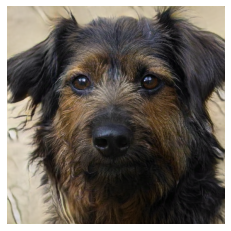

Seed 122


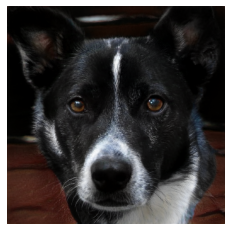

Seed 123


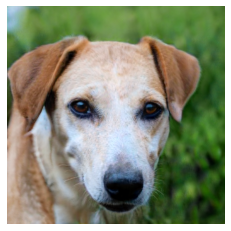

In [ ]:
SEED_MAIN = 120

# TASK: Experiment with different Models/URLs below

# Use Ctrl + Backslash(/) to uncomment/comment the below code:

# URL = "https://github.com/jeffheaton/pretrained-merry-gan-mas/releases/download/v1/christmas-gan-2020-12-03.pkl"
# URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl"
# URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"
URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/afhqdog.pkl"
# URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/afhqcat.pkl"

print(f'Loading networks from "{URL}"...')
device = torch.device('cuda')
with dnnlib.util.open_url(URL) as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device) # type: ignore

# Choose your own starting and ending seed.
SEED_FROM = SEED_MAIN
SEED_TO = SEED_MAIN + 4

# Generate the images for the seeds.
for i in range(SEED_FROM, SEED_TO):
  print(f"Seed {i}")
  z = seed2vec(G, i)
  img = generate_image(device, G, z)
  display_image(img)



## Interaction with *Smart* Language Models


Example: </br>
![image](https://1.bp.blogspot.com/-V_2Gwq5InrY/Xi9uCfqCciI/AAAAAAAAFOQ/Lwj3p0jADZ4SB9npvTdOdhLH6mYcx4aMgCLcBGAsYHQ/s1600/image3.gif)

GPT-J Code generation example:

In [ ]:
hfrom GPTJ.Basic_api import SimpleCompletion
# In the prompt enter something you want to generate
prompt = "def find_square_root(num):"

# The maximum length of the output response
max_length = 100

# Temperature controls the creativity of the model
# A low temperature means the model will take less changes when completing a prompt 
# A high temperature will make the model more creative
# Both temperature and top probability most be a float

temperature = 1.0

# top probability is an alternative way to control the randomness of the model
# If you are using top probability set temperature one
# If you are using temperature set top probability to one
top_probability = 0.5

# Initializing the SimpleCompletion class
# Here you set query equal to the desired values
# Note values higher that 512 tend to take more time to generate
query = SimpleCompletion(prompt, length=max_length, t=temperature, top=top_probability)

# Finally you assign a variable the function simple completion
Query = query.simple_completion()


        while num!= 0:
            if num % 2 == 0:
                return num
            num = num // 2
        return 0

if __name__ == '__main__':
    print(find_square_root


# Using GPT-3 (Yes, THE GPT-3)
## language translation using GPT-3 with the help of API key (It costs money but we are in beta so we can get use 18$!)
**Note:** You first have to register with OpenAI for beta program and once you get accepted, then you can start using this code!

In [ ]:
!pip install openai

Next, Get the API key from OpenAI at [this page](https://beta.openai.com/account/api-keys), and put it inside next input field:


In [20]:
#@title OpenAI API key { display-mode: "form" }
#put your api key here:
API_key = "" #@param {type:"string"}
import os
import openai
openai.api_key = API_key

In [21]:

response = openai.Completion.create(
  engine="davinci",
  prompt="The following is a conversation with an AI assistant. The assistant is helpful, creative, clever, and very friendly.\n\nHuman: Hello, who are you?\nAI: I am an AI created by OpenAI. How can I help you today?\nHuman: I'd like to cancel my subscription.\nAI:",
  temperature=0.9,
  max_tokens=150,
  top_p=1,
  frequency_penalty=0.0,
  presence_penalty=0.6,
  stop=["\n", " Human:", " AI:"]
)

In [22]:
print(response['choices'][0]['text'])

 I can't help with that. I'll look at the Tech Support website to see what I can do for you instead.


## BONUS
### **Face Transition GIF**

Generate GIF or snall transition video from each generated images for given particular seeds. This is achieved through transition of each generated images(i.e, faces) with some steps (here for eg. 100). The final generated frames are stored in results directory and we use ffmpeg command from linux terminal stich them together to get some beutiful (hopefully) nice looking face transition, morphing. 


In [ ]:
# Choose your seeds to morph through and the number of steps to take to get to each.

SEEDS = [1000,1003,1001]
STEPS = 100

# Remove any prior results
!rm /content/results/* 

from tqdm.notebook import tqdm

os.makedirs("./results/", exist_ok=True)

# Generate the images for the video.
idx = 0
for i in range(len(SEEDS)-1):
  v1 = seed2vec(G, SEEDS[i])
  v2 = seed2vec(G, SEEDS[i+1])

  diff = v2 - v1
  step = diff / STEPS
  current = v1.copy()

  for j in tqdm(range(STEPS), desc=f"Seed {SEEDS[i]}"):
    current = current + step
    img = generate_image(device, G, current)
    img.save(f'./results/frame-{idx}.png')
    idx+=1
 
# Link the images into a video.
!ffmpeg -r 30 -i /content/results/frame-%d.png -vcodec mpeg4 -y movie.mp4

Seed 1000:   0%|          | 0/100 [00:00<?, ?it/s]

Seed 1003:   0%|          | 0/100 [00:00<?, ?it/s]

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib